![title](http://www.wordstream.com/images/data-visualization-tools-concept.png)

In the previous unit, we last learned how to explore the data that we have in order to gather relevant insights about them. However, the method we used wasn't the most optimal in some cases. We usually just looked at some of the values and created a hypothesis based on what we saw. This isn't very practical because we are missing the whole picture, and maybe what we see isn't necessarily what we get. Enter **Visualizations**.

Visualizations are a very useful way to present data and insights to *mortals* and to yourself as well. Visualizations are usually colorful, descriptive, and most importantly: **tell a story**.  If someone, even a non-technical person sees a good visualization, they'll also learn what's going on with the data. **It's that powerful.**

![title](http://crimeresearch.org/wp-content/uploads/2014/03/Homicide-Rates-for-Developed-Countries-OECD-2011-or-latest-year.png)

For example, this bar chart shows homicide rates (in percentage) for developed countries in the year 2011 sorted from lowest to highest. But I probably didn't have tell you that. 

In Python, there are a multitude of libraries for creating data visualizations. However, the two most used ones are **matplotlib** and **seaborn**. Both libraries are really good, but seaborn looks nicer and has a greater variety of plots. For purposes of these notebooks, we'll use both. Let's start creating some visualizations by  loading the airline accident dataset.

In [1]:
import pandas as pd
air_accidents = pd.read_csv("airlines.csv")
print(air_accidents.shape)

(56, 8)


In [2]:
air_accidents.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


On this unit we'll look at 3 basic types of plots: **histograms**,**scatterplots**, **barplots**

## Histograms

Histograms are plots that are useful in presenting the distribution of a variable. Histograms model the frequency of the value of a variable in between ranges or "bins". This is useful in presenting if the values follow a normal distribution, meaning they are mostly centered around the mean, or they follow some other type of distribution. Let's try creating a histogram of the incidents from 1985 to 1999.  

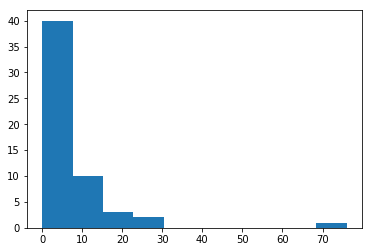

In [3]:
#Import the matplotlib plotting library, and name it plt, for easier access.
import matplotlib.pyplot as plt

#Create a histogram for the desired list, in this case the incidents from 85 to 99 and assign it to this variable.
incident_hist = plt.hist(air_accidents.incidents_85_99)
#Show the plot on the screen!
plt.show()

That's nice we created a plot, however it looks really bare. Let's start improving it by adding some labels and a title. And while we are at it, let's save create a function to reuse the plots.

In [4]:
def Plot_Histogram(feature,xlabel,ylabel,title,bins = 10):
    #Create a histogram with the specified parameters and number of bins.
    plt.hist(feature,bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

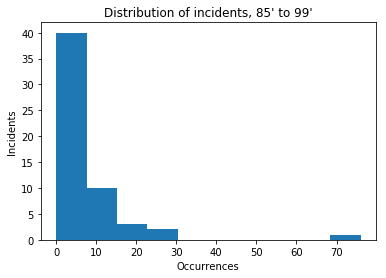

In [5]:
Plot_Histogram(air_accidents.incidents_85_99,"Occurrences","Incidents","Distribution of incidents, 85' to 99'")

That's much better, but there could still be improvements. For one, let's make the plot bigger! To do this, we have to modify the parameters of matplotlib plots. This can be done using the **rcParams** class from matplotlib, and then modifying the parameters we wish to change.

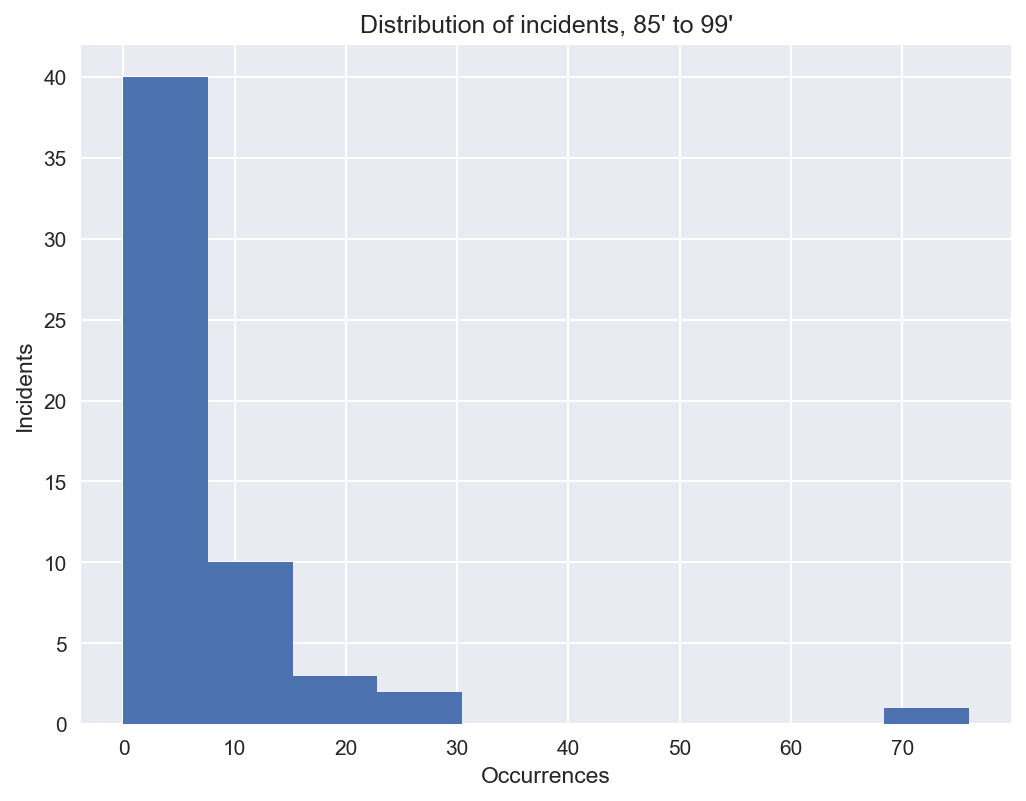

In [20]:
from matplotlib import rcParams #Import the params class.
def MatplotLib_Params():
    #The size of the figure.
    rcParams['figure.figsize'] = (8, 6)
    #Dots per inch or resolution of the figure.
    rcParams['figure.dpi'] = 150
    #Size of the letters and numbers in the plot.
    rcParams['font.size'] = 14

#Now let's try showing the histogram again. 
MatplotLib_Params()
Plot_Histogram(air_accidents.incidents_85_99,"Occurrences","Incidents","Distribution of incidents, 85' to 99'")

We can also experiment with different bins, to see if we can pinpoint in what specific range is the feature concentrated.

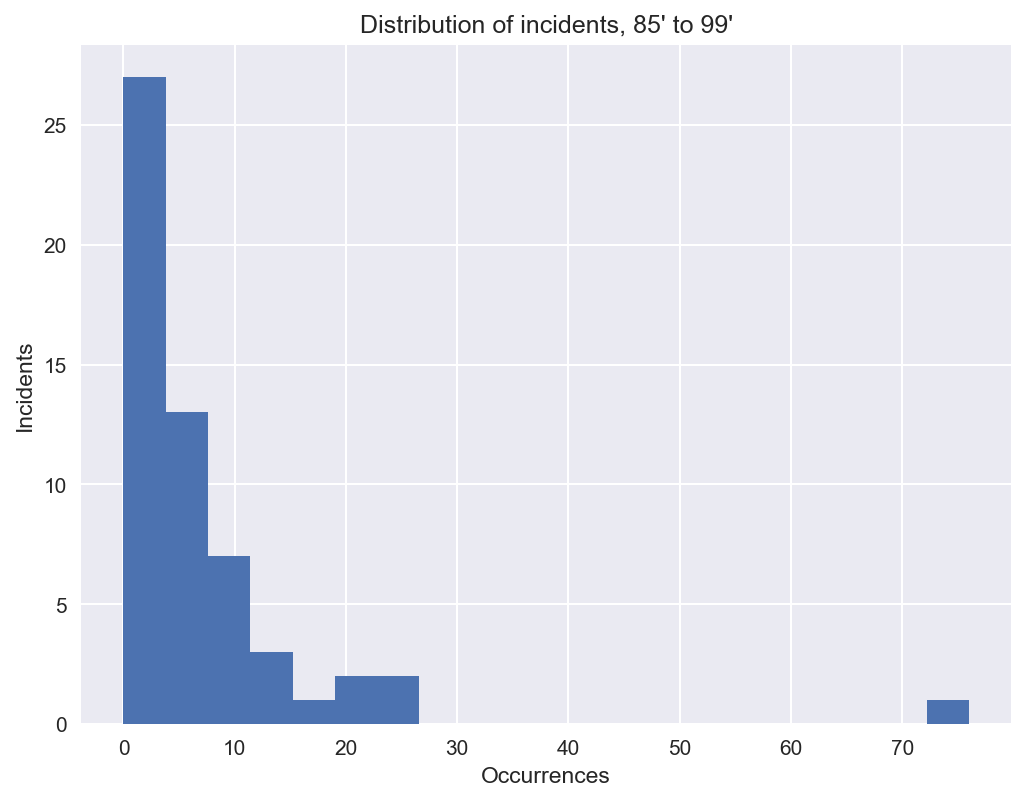

In [21]:
Plot_Histogram(air_accidents.incidents_85_99,"Occurrences","Incidents","Distribution of incidents, 85' to 99'",20)

Nice! There's more than we could do fidgeting with the parameters, but for now this will suffice. Let's try doing the same thing but with Seaborn.

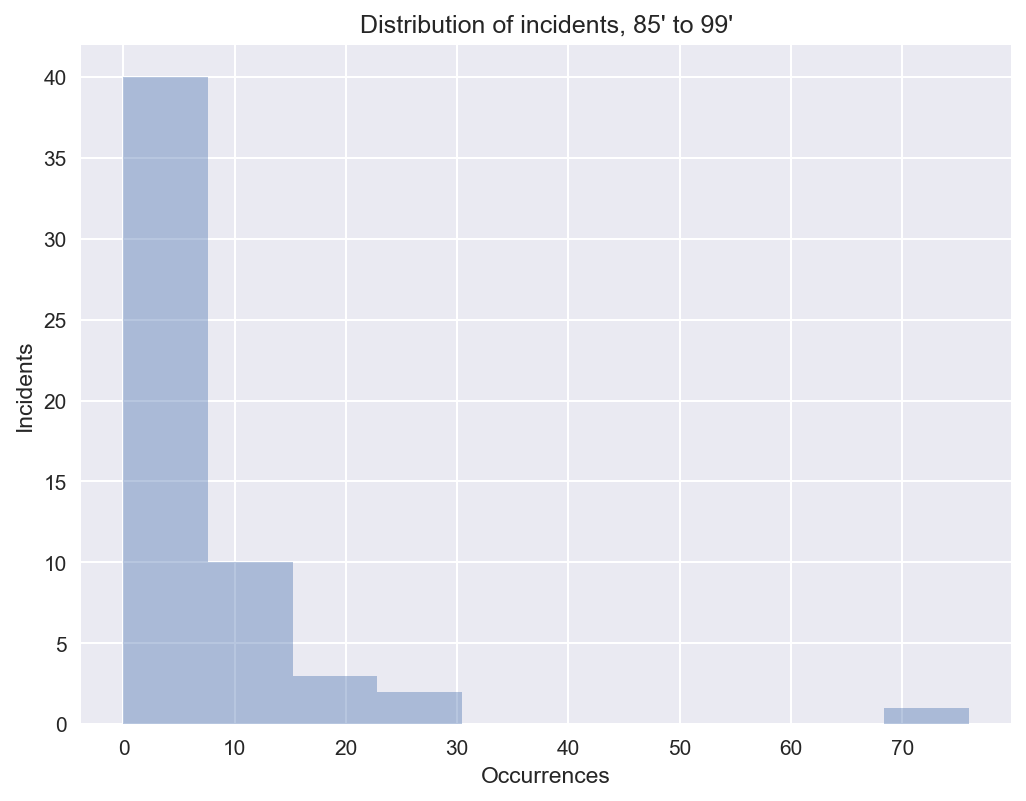

In [22]:
import seaborn as sns



def Seaborn_Histogram(feature,xlabel,ylabel,title,bins = 10):
    #In seaborn, it's called distance plot. Try removing the kde = False parameter and see what happens!
    ax = sns.distplot(feature,bins = bins,kde=False)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.title(title)
    plt.show()
    
Seaborn_Histogram(air_accidents.incidents_85_99,"Occurrences","Incidents","Distribution of incidents, 85' to 99'")

As you can see, seaborn is certainly **fancier**. However, which one to use is mostly up to preference.

#### Your turn now.
Create a histogram with the incidents from 2000 to 2014. How do they differ from the ones from 1985 to 1999?

In [23]:
#Your code here.

#### Your analysis here.

## Scatter plots

Scatterplots are plots designed to visualize the relationship between two **numerical values**. They answer questions like how does one variable increase/decrease on respect to another variable? For our dataset, let's try summing all incidents over the years, and comparing them to the available seat kilometer per week.

In [24]:
#Create a new dataframe with  only the incidents and fatalities.
incident_df = air_accidents[air_accidents.columns[2:]]
incident_df.head()

,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Total
0,2,0,0,0,0,0,2
1,76,14,128,6,1,88,313
2,6,0,0,1,0,0,7
3,3,1,64,5,0,0,73
4,2,0,0,2,0,0,4


In [25]:
#Now sum all perform row wise sum.
total = incident_df.sum(axis=1)
total.head()

0      4
1    626
2     14
3    146
4      8
dtype: int64

In [26]:
#Finally, insert the total into the air_accidents dataframe.
air_accidents["Total"] = total
air_accidents.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Total
0,Aer Lingus,320906734,2,0,0,0,0,0,4
1,Aeroflot*,1197672318,76,14,128,6,1,88,626
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,14
3,Aeromexico*,596871813,3,1,64,5,0,0,146
4,Air Canada,1865253802,2,0,0,2,0,0,8


With that little feature engineering out of the way, let's try plotting the relationship between available seat km and the total number of incidents using a scatterplot.

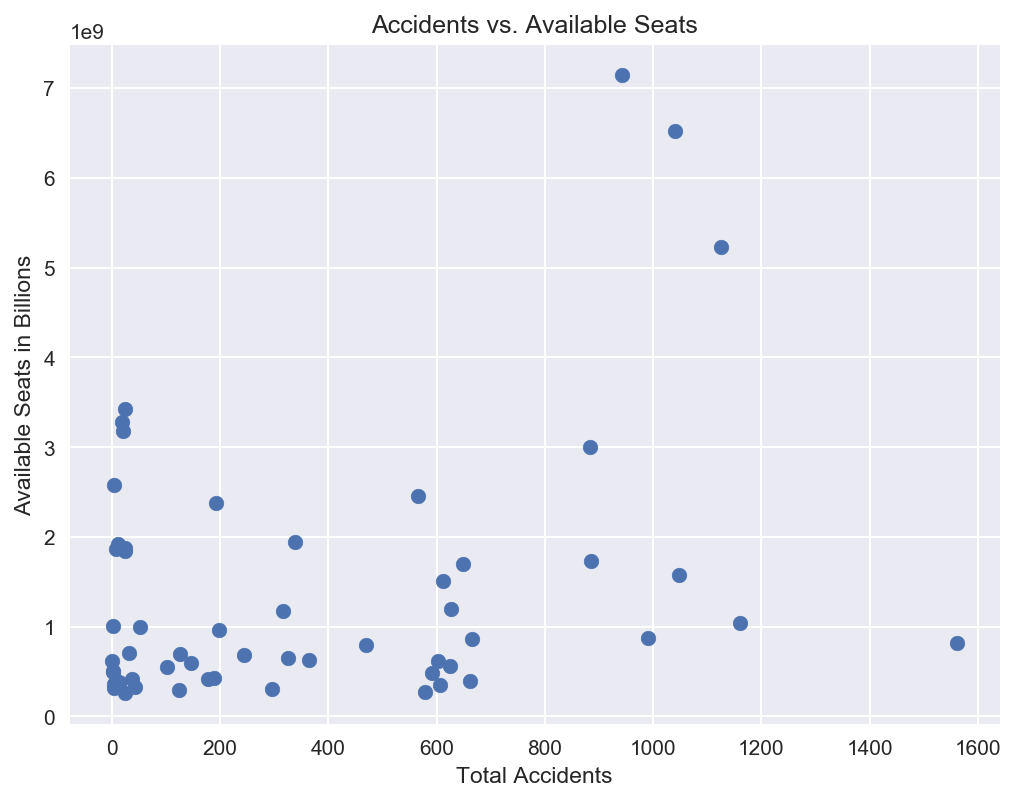

In [27]:
def Plot_Scatter(x,y,xlabel,ylabel,title):
    #The scatterplot plot function, takes an x parameter for the x axis, and a y parameter for the y axis.
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
Plot_Scatter(air_accidents.Total,air_accidents.avail_seat_km_per_week,"Total Accidents","Available Seats in Billions",
             "Accidents vs. Available Seats")

So, based on the scatterplot between the variables, there's no discernible relationship between the two variables, since the points are distributed without a visible pattern. In contrast, if we visualize the relationship between the number of fatal accidents and the number of fatalities, we should see a linear, increasing relationship. 

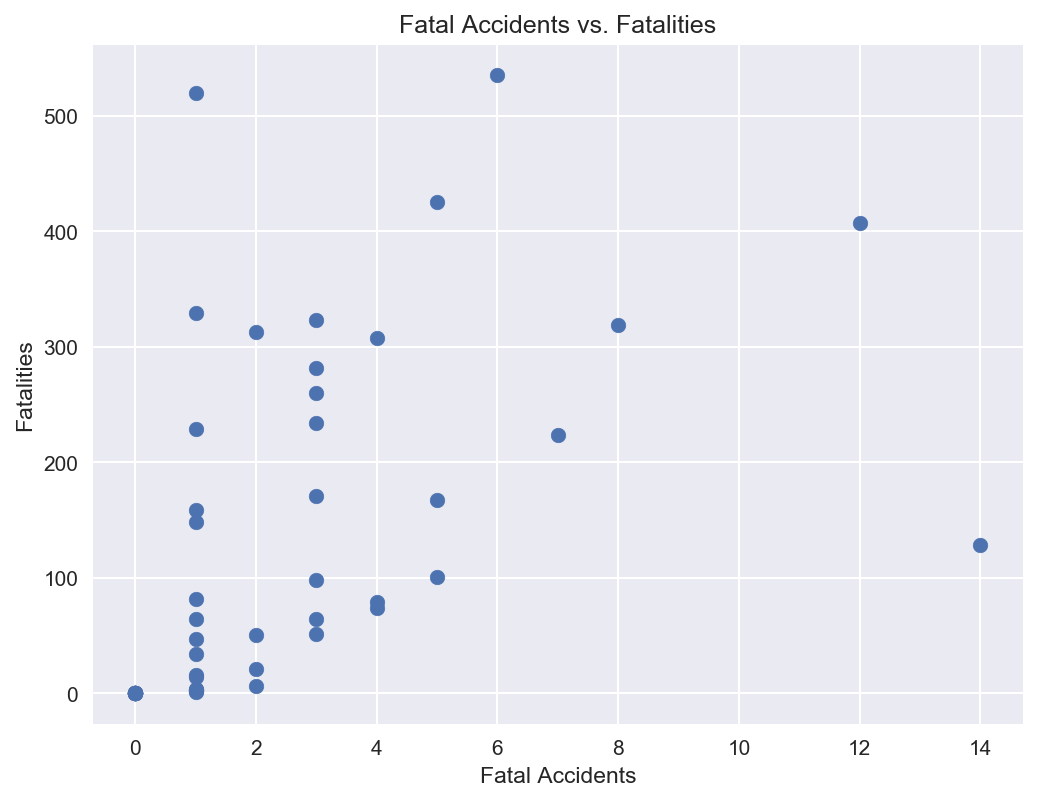

In [32]:
Plot_Scatter(air_accidents.fatal_accidents_85_99,air_accidents.fatalities_85_99,"Fatal Accidents",
             "Fatalities","Fatal Accidents vs. Fatalities")

While it's certainly not as visible, because both variables are discrete and there aren't enough samples, we can see that as the number of accidents increases, the number of fatalities increases. Of course since this is airline accidents we're talking about, 2 accidents don't have the same number of fatalities.  

As you may have noticed, our previous plots style has changed. That's because seaborn plots have a style that is derived from matplotlib styling, which means they actually share their styles!
In seaborn to plot this we would use this:

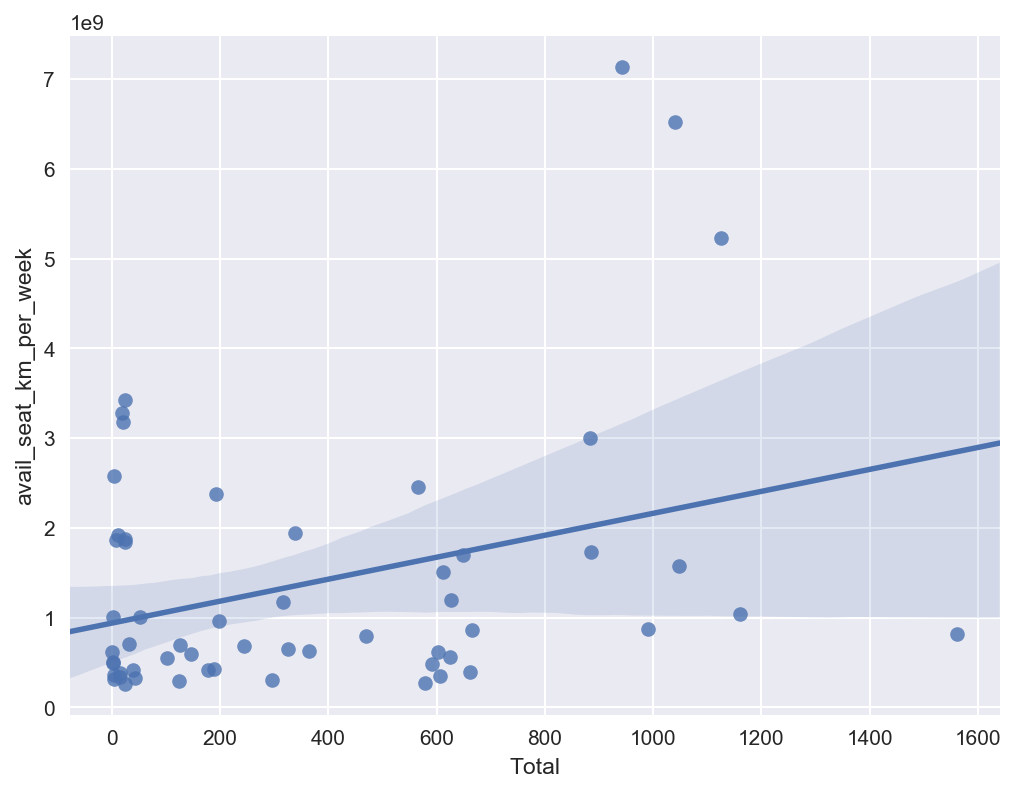

In [33]:
def Seaborn_Scatter(x,y,data):
    #Use the parameters passed to the function as the parameters of the seaborn plot.
    ax = sns.regplot(x=x, y=y, data=data)
    plt.show()

Seaborn_Scatter("Total","avail_seat_km_per_week",air_accidents)

#### Your turn now.

Plot the relationship between Fatal accidents and Fatalities in  2000 - 2014. How does it compare to the ones pre-2000?

In [50]:
#Your code here.

**Your analysis here.**

## Bar plots

Bar plots are plots used to describe the relationship between a **label** and a **numerical** feature. One example of this would be the population by country, Country being the label and population being the numerical feature. If we take a look at the dataset we are currently using, we won't find any useful label or categorical variable, since  our only character feature would be the names of the airlines themselves. Fortunately, we know how to do feature engineering, so  creating a new feature should be a piece of cake. Let's try dividing airlines between Unsafe,Regular and Safe based on the number of total incidents.

In [51]:
#First, check the distribution of the Total.
air_accidents.Total.describe()

count     56.000000
mean     182.071429
std      196.228054
min        0.000000
25%       12.000000
50%       97.500000
75%      307.500000
max      781.000000
Name: Total, dtype: float64

In [34]:
def Classify_Airlines(total):
    if total <=100:
        return "Safe"
    elif total>100 and total <=250:
        return "Regular"
    else:
        return "Unsafe"
    
air_accidents["Safety"] = air_accidents.Total.apply(lambda total:Classify_Airlines(total))
air_accidents.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Total,Safety
0,Aer Lingus,320906734,2,0,0,0,0,0,4,Safe
1,Aeroflot*,1197672318,76,14,128,6,1,88,626,Unsafe
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,14,Safe
3,Aeromexico*,596871813,3,1,64,5,0,0,146,Regular
4,Air Canada,1865253802,2,0,0,2,0,0,8,Safe


Now that we have a categorical value, let's start plotting. First let's see how the three categories compare:

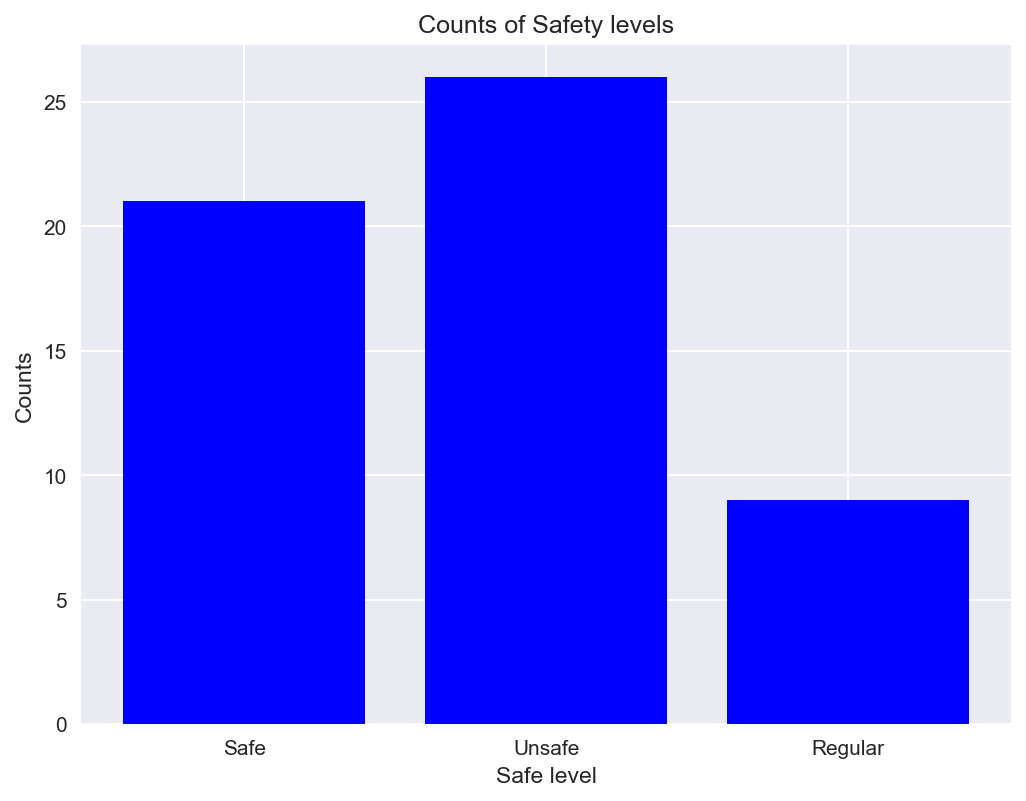

In [35]:
#Our useful function, as usual.
import numpy as np
def Plot_Bar(x,y,xlabel,ylabel,title,color = "blue"):
    #First, create dummy numbers to be replaced by our labels.
    labels = x
    #Create equally distanced numbers, remember that numpy lesson!
    x = np.arange(0,len(x),1)
    plt.bar(x,y,color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #Replace the numbers with the actual names.
    plt.xticks(x,labels)
    plt.show()

#Create a dataframe with the total counts for each label.
Safety_Counts_Kids = air_accidents.Safety.value_counts(sort=False)

Plot_Bar(Safety_Counts_Kids.keys(),Safety_Counts_Kids.values,
         "Safe level","Counts","Counts of Safety levels")

We are in luck, by our criteria most airlines are safe. However, there's still an unsettling number of unsafe airlines. To better work with categorical data and barplots, let's use the useful **group by** function that pandas so gratiously gives us.  

In [36]:
Grouped_Safe = air_accidents.groupby("Safety").mean()
Grouped_Safe

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Total
Safety,,,,,,,,
Regular,7.788586e+08,5.111111,1.555556,41.555556,3.222222,0.444444,31.333333,166.444444
Safe,1.271617e+09,2.333333,0.428571,3.047619,2.285714,0.095238,0.476190,17.333333
Unsafe,1.685581e+09,11.807692,3.807692,225.269231,5.923077,1.192308,108.346154,712.692308


And now, lets plot how the 3  types compare on available seats.

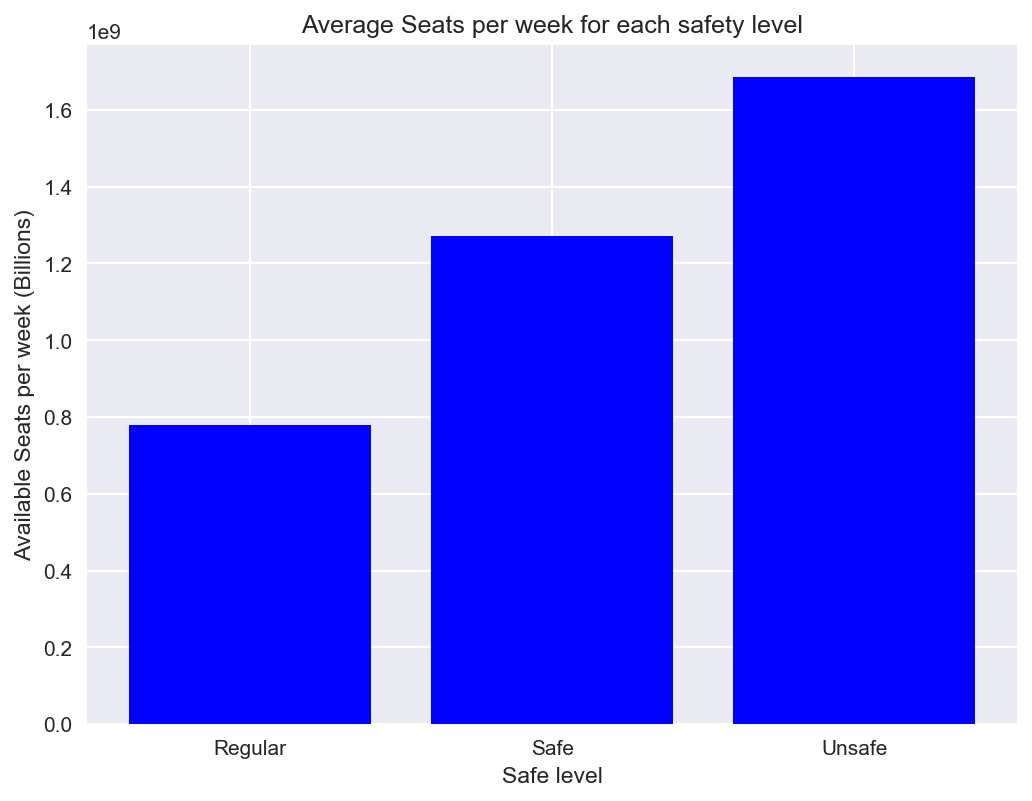

In [37]:
Plot_Bar(Grouped_Safe.index,Grouped_Safe.avail_seat_km_per_week,
         "Safe level","Available Seats per week (Billions)","Average Seats per week for each safety level")

It seems that the unsafe airlines' reputation precedes them, since these ones are the ones with the most free seats per week, even though there are way more safe airlines than unsafe ones. 


To do this in seaborn we would do this:

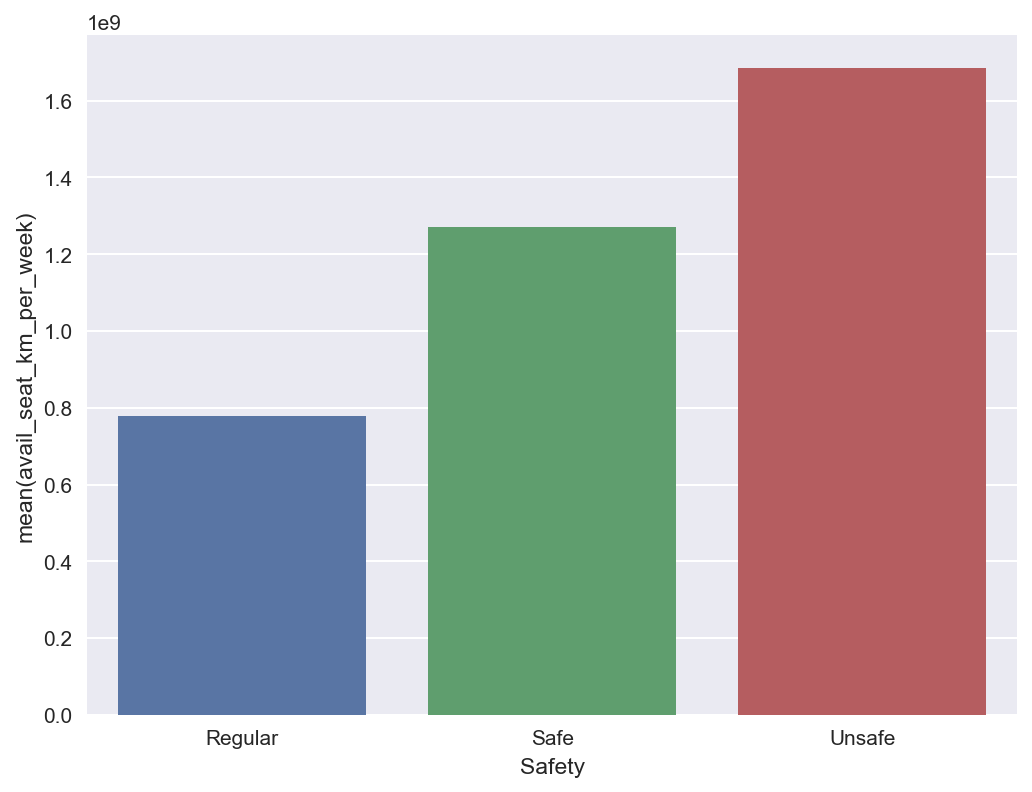

In [44]:
def Seaborn_Bar(x,y,data):
    ax = sns.barplot(x=x, y=y, data=data.reset_index())
    plt.show()

Seaborn_Bar("Safety","avail_seat_km_per_week",Grouped_Safe)

### To Summarize: 

- Use histograms when trying to visualize the **distribution** of a variable.

- Use scatterplots when trying to visualize the relationship between to **numerical** variables.

- Use barplots when trying to visualize the relationship between a **categorical** variable or label and a **numerical** value.



## Exercise.

Create one of each visualization type detailed in this notebook on the "2010_Report_to_Congress_on_White_House_Staff" dataset, which is located on the "2010_Report_to_Congress_on_White_House_Staff.csv" file.

In [72]:
WH_Salaries = pd.read_csv("2010_Report_to_Congress_on_White_House_Staff.csv")

FileNotFoundError: File b'2010_Report_to_Congress_on_White_House_Staff.csv' does not exist

## Further Reading

- seaborn barplots: http://seaborn.pydata.org/generated/seaborn.barplot.html]
- seaborn distribution: http://seaborn.pydata.org/tutorial/distributions.html
- seaborn scatterplot: http://seaborn.pydata.org/generated/seaborn.regplot.html
- matplotlib docs:  http://matplotlib.org/api/pyplot_summary.html